In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('/content/gold_price_data.csv')

In [3]:
df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


In [5]:
df.describe()

,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace= True)

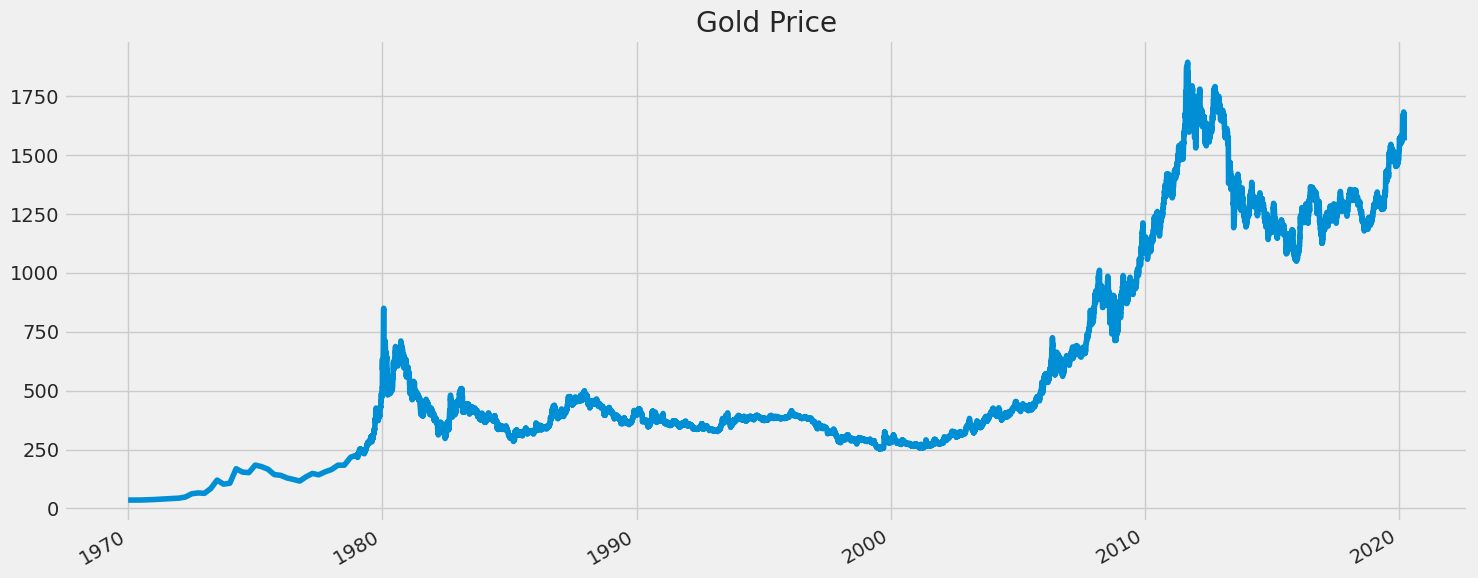

In [7]:
plt.figure(figsize=(15, 6))
df['Value'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Gold Price")
plt.tight_layout()
plt.show()

In [8]:
n_cols = 1
dataset = df["Value"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(10787, 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [10]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 8090 Test Size : 2697


In [11]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(8090, 1)

In [12]:
x_train = []
y_train = []
time_steps = 100
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[5.37663315e-05],
       [0.00000000e+00],
       [1.61298995e-04],
       [5.91429647e-04],
       [1.23662563e-03],
       [2.04312060e-03],
       [2.68831658e-03],
       [3.70987688e-03],
       [4.51637185e-03],
       [7.09715576e-03],
       [1.45169095e-02],
       [1.63449648e-02],
       [1.54847035e-02],
       [2.65068014e-02],
       [4.57013818e-02],
       [3.65073391e-02],
       [3.84966934e-02],
       [7.16705199e-02],
       [6.39819345e-02],
       [6.27453089e-02],
       [8.00043013e-02],
       [7.64557234e-02],
       [7.06489596e-02],
       [5.82827034e-02],
       [5.65621808e-02],
       [5.05941180e-02],
       [4.72068391e-02],
       [4.34969622e-02],
       [5.34437335e-02],
       [6.08634873e-02],
       [5.77988064e-02],
       [6.47346632e-02],
       [6.98424646e-02],
       [7.97354696e-02],
       [7.96817033e-02],
       [9.78547234e-02],
       [1.02639927e-01],
       [1.02639927e-01],
       [1.03070058e-01],
       [9.8661

In [13]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [15]:
x_train.shape , y_train.shape

((7990, 100, 1), (7990, 1))

In [17]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
250/250 [==============================] - 31s 102ms/step - loss: 4.2612e-04 - mean_absolute_error: 0.0095
Epoch 2/100
250/250 [==============================] - 29s 118ms/step - loss: 6.8778e-05 - mean_absolute_error: 0.0052
Epoch 3/100
250/250 [==============================] - 26s 103ms/step - loss: 6.7997e-05 - mean_absolute_error: 0.0054
Epoch 4/100
250/250 [==============================] - 23s 93ms/step - loss: 5.5242e-05 - mean_absolute_error: 0.0048
Epoch 5/100
250/250 [==============================] - 22s 88ms/step - loss: 5.2303e-05 - mean_absolute_error: 0.0046
Epoch 6/100
250/250 [==============================] - 27s 110ms/step - loss: 5.1352e-05 - mean_absolute_error: 0.0047
Epoch 7/100
250/250 [==============================] - 25s 99ms/step - loss: 5.0048e-05 - mean_absolute_error: 0.0048
Epoch 8/100
250/250 [==============================] - 23s 93ms/step - loss: 4.1944e-05 - mean_absolute_error: 0.0042
Epoch 9/100
250/250 [==============================]

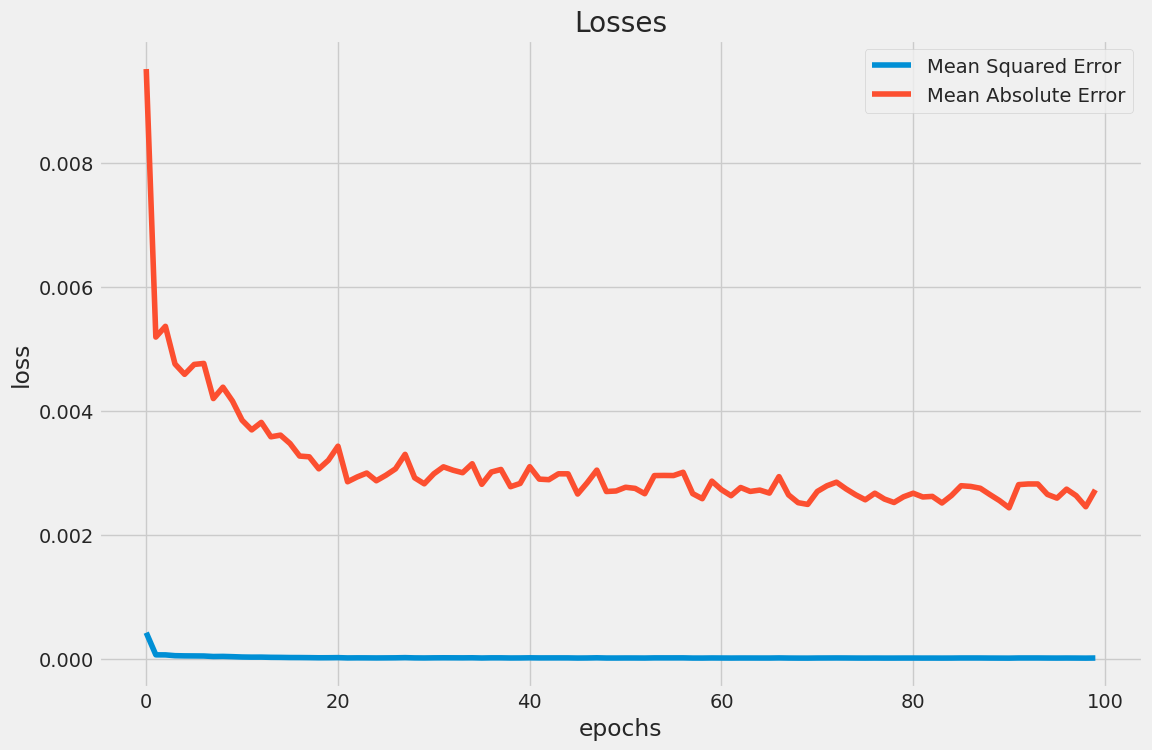

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [41]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [42]:
x_test.shape , y_test.shape

((2697, 60, 1), (2697, 1))

In [43]:
import numpy as np

# Assuming x_test has a shape of (None, 60, 1)
desired_shape = (100, 1)

# Reshape x_test to match the desired shape
x_test_reshaped = np.pad(x_test, ((0, 0), (40, 0), (0, 0)), mode='constant', constant_values=0)
# The above line pads the second dimension (60) to match the desired shape (100)

predictions = model.predict(x_test_reshaped)


85/85 [==============================] - 0s 1ms/step


In [44]:
predictions = model.predict(x_test)

85/85 [==============================] - 0s 1ms/step


In [46]:
# Assuming predictions has a shape of (batch_size, sequence_length, features)
# Reshape predictions to a 2D array
predictions_reshaped = predictions.reshape(-1, 1)

# Use inverse_transform on the reshaped predictions
predictions_inverse = scaler.inverse_transform(predictions_reshaped)

# Reshape the predictions back to the original shape if needed
predictions_inverse = predictions_inverse.reshape(predictions.shape)


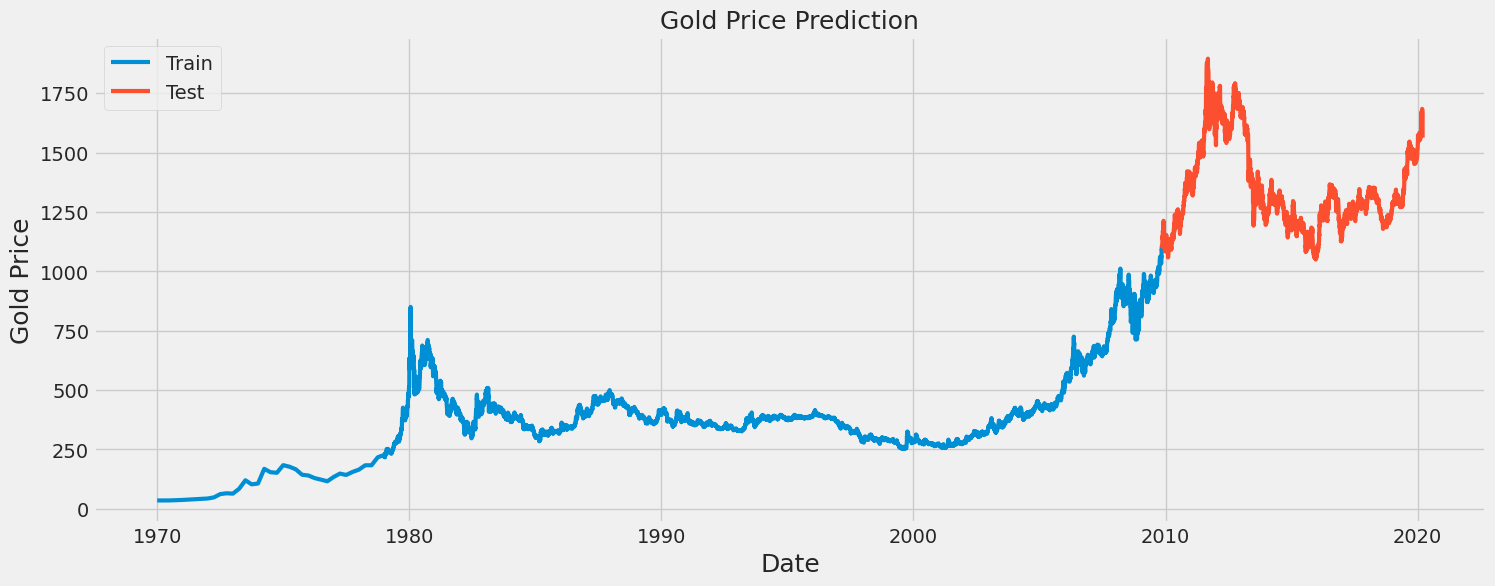

In [58]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Gold Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Gold Price', fontsize= 18)
plt.plot(train['Value'], linewidth= 3)
plt.plot(test['Value'], linewidth= 3)

plt.legend(['Train', 'Test', 'Predictions'])